In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


#Generate data

In [3]:
import random
lstX = []
lstY = []
for x in range(-100, 100, 5):
  lstX.append([x])
  y = 3*x + random.uniform(0, 1)*100
  lstY.append([y])

In [4]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(32, 1) (8, 1) (32, 1) (8, 1)


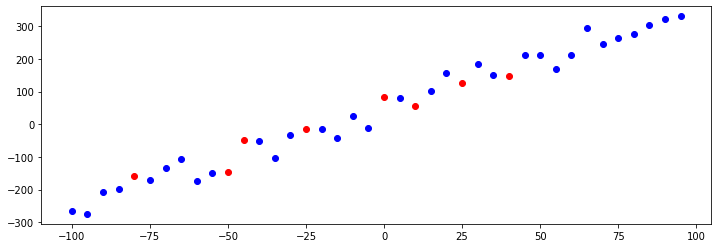

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN

In [7]:
import torch.nn as nn

In [8]:
MyNet = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


In [9]:
from torchsummary import summary
summary(MyNet, input_size=(10, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 10, 100]             200
              ReLU-2              [-1, 10, 100]               0
            Linear-3               [-1, 10, 50]           5,050
              ReLU-4               [-1, 10, 50]               0
            Linear-5                [-1, 10, 1]              51
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.02
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [10]:
loss_func = torch.nn.MSELoss()

In [11]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Train N epoches

In [12]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [13]:
lossLst = []
for epoch in range(1, 500):
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY_hat, tensorY)
    loss1 = float(loss)
    #print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

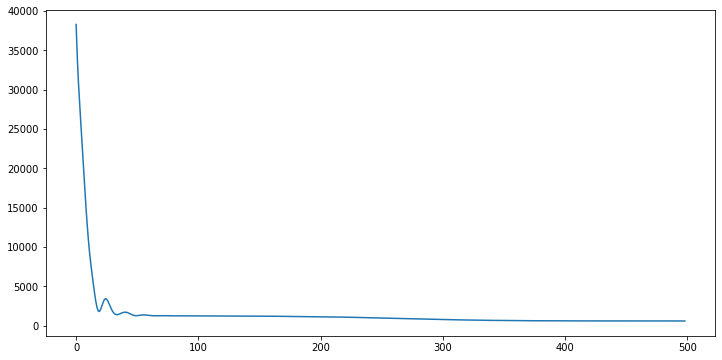

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

##Training data performance

In [15]:
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

601.34


In [16]:
trainY = tensorY.detach().cpu().numpy()

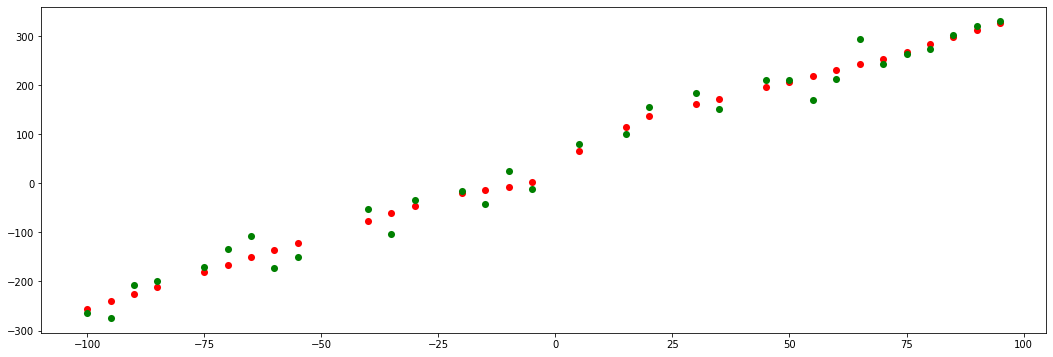

In [17]:
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color="red")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="green")
plt.show()

# Test 

In [18]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY_hat = torch.FloatTensor(testY_hat).to(device)
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)))

1302.25


In [19]:
testY = tensorY.detach().cpu().numpy()

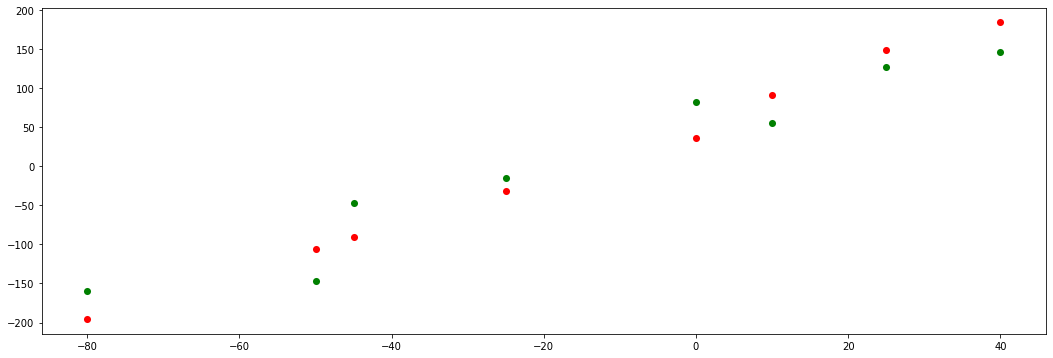

In [20]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY, s=50, lw=0, color="red")
plt.scatter(testX, testY_hat, s=50, lw=0, color="green")
plt.show()

# Train with early stop

1. Generate data
2. Build NN
3. Train N epoches (modify training loop)
4. Training data performance
5. Test

In [ ]:
tensor_trainX = torch.FloatTensor(trainX).to(device)
tensor_trainY_hat = torch.FloatTensor(trainY_hat).to(device)
tensor_validX = torch.FloatTensor(validX).to(device)
tensor_validY_hat = torch.FloatTensor(validY_hat).to(device)

In [ ]:
# Early stopping
the_last_loss = 100000
patience = 2
trigger_times = 0
trainLossLst = []
validLossLst = []
for epoch in range(1, 500):
    tensor_trainY = MyNet(tensor_trainX)
    train_loss = loss_func(tensor_trainY, tensor_trainY_hat)
    trainLossLst.append(float(train_loss))
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    tensor_validY = MyNet(tensor_validX)
    valid_loss = loss_func(tensor_validY, tensor_validY_hat)
    validLossLst.append(float(valid_loss))

    #early stop
    the_current_loss = float(valid_loss)
    if(the_current_loss > the_last_loss):
      trigger_times += 1
      print('trigger times:', trigger_times)
      if trigger_times >= patience:
        print('Early stopping!')
        break  # early stop when valid loss drops 2 consective times
    elif(trigger_times >0):
      print('trigger times reset to 0')
      trigger_times = 0
    the_last_loss = the_current_loss

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(trainLossLst, color="blue")
plt.plot(validLossLst, color="green")
plt.show()

#Add L2 regularization to NN parameters

1. Generate data
2. Build NN (modify optimizer)
3. Train N epoches 
4. Training data performance
5. Test

In [ ]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005, weight_decay=0.0001)

# Add L1 regularization to NN parameters

1. Generate data
2. Build NN 
3. Train N epoches (add L1 regularization to training loop)
4. Training data performance
5. Test

In [ ]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [ ]:
lamda = 0.001

In [ ]:
lossLst = []
for epoch in range(1, 500):
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY_hat, tensorY)
    loss1 = float(loss)
    #print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)

    # add L1 regularization
    regularization_loss = 0
    for name, param in MyNet.named_parameters():
      if('weight' in name):
        regularization_loss += torch.sum(abs(param))

    loss = loss + lamda * regularization_loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#Initialize NN with small weights

1. Generate data
2. Build NN (initialize NN with small weights)
3. Train N epoches 
4. Training data performance
5. Test

In [ ]:
for param in MyNet.parameters():
  if param.requires_grad:
    print(param.data)

In [ ]:
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.002)
    print(param)

#Drop out

1. Generate data
2. Build NN (with drop out)
3. Train N epoches
4. Training data performance (turn NN to eval mode)
5. Test (turn NN to eval mode)

In [ ]:
MyNet = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(50, 1),
)
MyNet.to(device)
print(MyNet)

### model.eval() will turn model to test mode and PyTorch will automatically handle weight scaling of the dropout layer

In [ ]:
MyNet.eval()